# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

# [Answer to Ex. 2.2 here] (convert to markdown cell)


List1
1. Dette er den første
2. Dette er den anden

## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [1]:
import pandas as pd
import numpy as np
import requests
import random
import json
import re
import pprint
from bs4 import BeautifulSoup
# [Answer to Ex. 3.1.3 here] 
l1=['r ', 'Is', '>', ' < ', 'g ', '?']
' '.join(['Is', 'r '.strip(), '>', 'g '.strip()+ '?' ])

'Is r > g?'

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [2]:
# [Answer to Ex. 3.1.4 here]
keys=['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
values=[True, False, False, True, False, False, True]
key_values= list(zip(keys, values))

words=dict(key_values)
print(words)

{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [5]:
# [Answer to Ex. 3.3.2 here]

#3.3.1
root= 'https://api.statbank.dk/v1/data/'
form='/JSONSTAT?valuePresentation=Default'

response_dst=requests.get(root)
response_dst.ok


def construct_link(table_id, strings):
    root_table=root + table_id + form
    for i in strings:
        root_table=root_table + '&' + i
    return root_table

url=construct_link('FOLK1A', ['Tid=*', 'alder=IALT', 'køn=2', 'område=157', 'civilstand=U'])

response_dst1=requests.get(url)
response_dst1.ok

print(url)

#3.3.2
def getdata(url):
    response_dst=requests.get(url)
    if response_dst.ok:
        print('It went well')
        with open('my_file.json', 'w') as f:
            response_json_str = json.dumps(response_dst.json()) #
            f.write(response_json_str)
        return response_dst.json()
    else:
        print('It went wrong')

#
url=construct_link('FOD', ['Tid=*', 'BARNKON=P'])

print(url)

piger=getdata(url)

import pprint
pprint.pprint(piger)

https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?valuePresentation=Default&Tid=*&alder=IALT&køn=2&område=157&civilstand=U
https://api.statbank.dk/v1/data/FOD/JSONSTAT?valuePresentation=Default&Tid=*&BARNKON=P
It went well
{'dataset': {'dimension': {'BARNKON': {'category': {'index': {'P': 0},
                                                    'label': {'P': 'Piger'}},
                                       'label': 'barnets køn'},
                           'ContentsCode': {'category': {'index': {'FOD': 0},
                                                         'label': {'FOD': 'Levendefødte'},
                                                         'unit': {'FOD': {'base': 'antal',
                                                                          'decimals': 0}}},
                                            'label': 'Indhold'},
                           'Tid': {'category': {'index': {'1973': 0,
                                                          '1974': 1,
           

## Problems from exercise set 4


In [2]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). 
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [3]:
# [Answer to Ex. 4.1.1 here]

url='https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz' # url to weather data

# fetch data via pandas csv-reader
df_weather = pd.read_csv(url,
                        compression='gzip',
                        header=None)

# print the first five records
print(df_weather.head())

             0         1     2    3    4    5  6   7
0  ITE00100550  18640101  TMAX   10  NaN  NaN  E NaN
1  ITE00100550  18640101  TMIN  -23  NaN  NaN  E NaN
2  ITE00100550  18640101  PRCP   25  NaN  NaN  E NaN
3  ASN00079028  18640101  PRCP    0  NaN  NaN  a NaN
4  USC00064757  18640101  PRCP  119  NaN  NaN  F NaN


> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [4]:
# [Answer to Ex. 4.1.2 here]
# list with column names
headers = ['station_id', 'date', 'obs_type', 'obs_value']

# select the first 4 colomn being the interesting ones
df_weather2 = df_weather.iloc[:,:4]

# rename columns to headers-list
df_weather2.columns = headers

# according to documentation on the website, the observations are in tenth
# recalculate the observation value to unit
df_weather2['obs_value'] = df_weather2['obs_value'] / 10

# print the first five observations
print(df_weather2.head())


    station_id      date obs_type  obs_value
0  ITE00100550  18640101     TMAX        1.0
1  ITE00100550  18640101     TMIN       -2.3
2  ITE00100550  18640101     PRCP        2.5
3  ASN00079028  18640101     PRCP        0.0
4  USC00064757  18640101     PRCP       11.9


> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [6]:
# [Answer to Ex. 4.1.3 here]
'''
.copy() is used to disconnect the new DataFrame from the old. When setting a 
dataframe equal to another, it only creates a second reference to the same data.
Using .copy() will copy the data rather than the reference, thus disconnecting 
the new DataFrame name from the old data. Otherwise changes in one will affect the other.
'''

# select station = ITE00100550 and only observations with max temperature
df_select = df_weather2[(df_weather2.station_id == 'ITE00100550') & (df_weather2.obs_type == 'TMAX')].copy()

# print first five observations
print(df_select.head())

      station_id      date obs_type  obs_value
0    ITE00100550  18640101     TMAX        1.0
75   ITE00100550  18640102     TMAX        0.8
152  ITE00100550  18640103     TMAX       -2.8
227  ITE00100550  18640104     TMAX        0.0
305  ITE00100550  18640105     TMAX       -1.9


> **Ex. 4.1.4:** Make a new column called `TMAX_F` where you have converted the temperature variables to Fahrenheit. 
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [7]:
# [Answer to Ex. 4.1.4 here]
# create new variable containing temperature in Fahrenheit
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']

# print first five observations
print(df_select.head())


# this next part is just to make things easier in the later exercises
# reset index
df_select2 = df_select.reset_index(drop=True)
# Saves data in CSV file for later use
df_select.to_csv('weather.csv', index=False)

      station_id      date obs_type  obs_value  TMAX_F
0    ITE00100550  18640101     TMAX        1.0   33.80
75   ITE00100550  18640102     TMAX        0.8   33.44
152  ITE00100550  18640103     TMAX       -2.8   26.96
227  ITE00100550  18640104     TMAX        0.0   32.00
305  ITE00100550  18640105     TMAX       -1.9   28.58


## Problems from exercise set 5

In [13]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


In [ ]:
# [Answer to Ex. 5.1.1 here]

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

In [ ]:
# [Answer to Ex. 5.1.2 here]

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

In [ ]:
# [Answer to Ex. 5.1.3 here]

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

In [ ]:
# [Answer to Ex. 5.1.4 here]

## Problems from exercise set 6

> _Note:_ A central part of these exercises and the ones from exercise set 7 is downloading data from the NOAA servers. If you cannot complete this part, you can download the data as csv files **from [github](https://github.com/abjer/sds/tree/master/material/session_7)**.

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

    station_id      date obs_type  obs_value  TMAX_F
0  ITE00100550  18640101     TMAX        1.0   33.80
1  ITE00100550  18640102     TMAX        0.8   33.44
2  ITE00100550  18640103     TMAX       -2.8   26.96
3  ITE00100550  18640104     TMAX        0.0   32.00
4  ITE00100550  18640105     TMAX       -1.9   28.58
366
    station_id       date obs_type  obs_value  TMAX_F  Month
0  ITE00100550 1864-01-01     TMAX        1.0   33.80      1
1  ITE00100550 1864-01-02     TMAX        0.8   33.44      1
             station_id obs_type  obs_value  TMAX_F  Month
date                                                      
1864-01-01  ITE00100550     TMAX        1.0   33.80      1
1864-01-02  ITE00100550     TMAX        0.8   33.44      1
1864-01-03  ITE00100550     TMAX       -2.8   26.96      1
1864-01-04  ITE00100550     TMAX        0.0   32.00      1
1864-01-05  ITE00100550     TMAX       -1.9   28.58      1
1864-01-06  ITE00100550     TMAX       -1.3   29.66      1
1864-01-07  ITE00100550

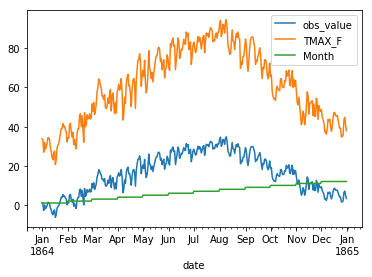

In [4]:
# [Answer to Ex. 6.1.4]

#6.1.1
# fetches weather data from our github group, i.e. sample directory as this program
# we can use a relative path
url='weather.csv'
df_weather = pd.read_csv(url)

print(df_weather.head(5))
print(len(df_weather))

#6.1.2
df_weather['date']=pd.to_datetime(df_weather['date'], format='%Y%m%d')
#print(df_weather.head(2))

df_weather['Month']=df_weather['date'].dt.month
print(df_weather.head(2))

#6.1.3
df_weather.set_index('date', inplace=True)
print(df_weather.head(9))
df_weather.plot()


##6.1.4
df_weather['country']=df_weather['station_id'].str[:3]
print(df_weather.head(5))

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [32]:
# [Answer to Ex. 6.1.5]
import time

def get_weather(nyear):
    # function to get and structure weather data from NOAA
    # input is a year in 4-digit integer
    # output is a DataFrame     
    time.sleep(1) # take a rest to prevent denial of services attack
    url='https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/' + str(nyear) + '.csv.gz' # the url to data file
    # retrieve data
    df_weather = pd.read_csv(url,
                        compression='gzip',
                        header=None)
    headers = ['station_id', 'date', 'obs_type', 'obs_value'] # list of new column names
    df_weather2 = df_weather.iloc[:,:4] # select the first four variables
    df_weather2.columns = headers # we change the names of the columns
    df_weather2['obs_value'] = df_weather2['obs_value'] / 10 # the values in tenth are changed to units
    
    df_select = df_weather2[(df_weather2.obs_type == 'TMAX')].copy() # only obs of max temp is selected
    
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value'] # calculate Fahrenheit
    df_select=df_select.reset_index(drop=True) # reset index
    
    df_select['date']=pd.to_datetime(df_select['date'], format='%Y%m%d') # reformat date to datetime format
    df_select['Month']=df_select['date'].dt.month # create variable month
    df_select['country']=df_select['station_id'].str[:2] # create variable country from station ID
    return df_select
    
weather = get_weather(1864)
print(type(weather))
print(weather.head())

<class 'pandas.core.frame.DataFrame'>
    station_id       date obs_type  obs_value  TMAX_F  Month country
0  ITE00100550 1864-01-01     TMAX        1.0   33.80      1      IT
1  ASN00086071 1864-01-01     TMAX       21.4   70.52      1      AS
2  CA006158350 1864-01-01     TMAX        1.1   33.98      1      CA
3  EIE00101859 1864-01-01     TMAX        9.4   48.92      1      EI
4  BE000006447 1864-01-01     TMAX       -2.3   27.86      1      BE


## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [5]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

STATISTICS ON MAX TEMPERATURE ON STATION ITE00100550
mean    16.249727
max     34.800000
min     -6.300000
25%      7.600000
75%     25.325000
Name: obs_value, dtype: float64


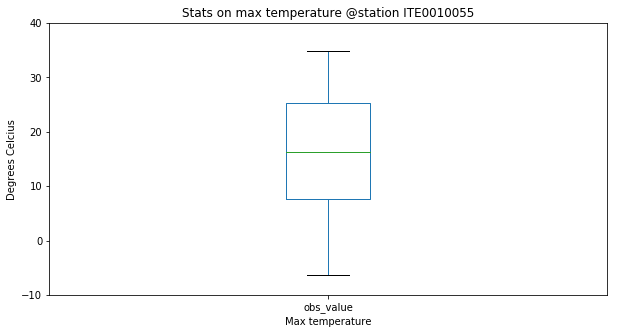

In [112]:
# [Answer to Ex. 7.1.1]
# use the function from 6.1.5 to fetch weather data
#df_weather = get_weather(1864)

# Statistics on station ITE00100550 and the variable obs_value
descr = df_weather[df_weather.station_id=='ITE00100550']['obs_value'].describe()

# print out stats
print("STATISTICS ON MAX TEMPERATURE ON STATION ITE00100550")
print(descr[['mean', 'max', 'min', '25%', '75%']])

# the plot thickens - create boxplot
# first define the surroundings
f, a = plt.subplots(figsize=(10, 5))
a.set_title("Stats on max temperature @station ITE0010055")
a.set(xlabel='Max temperature', 
      ylabel='Degrees Celcius',
      ylim=(-10,40))

# create the plot
descr[['mean', 'max', 'min', '25%', '75%']].plot.box()



> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [52]:
# [Answer to Ex. 7.1.2]
list_df = [] # an empty container for the dataframes
for year in range(1864, 1868) : # the years we want - remember: the last input is not processed
    list_df.append(get_weather(year))

# make vertical concatenation of the DataFrames using pd.concat
df_weather2 = pd.concat(list_df)

# print the type of the resulting data
print(type(df_weather2))
# print the number of observations using the len() function
print("Number of observations in data set: " + str(len(df_weather2)))

<class 'pandas.core.frame.DataFrame'>
Number of observations in data set : 29638



> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [58]:
# [Answer to Ex. 7.1.3]
# retrieve station locations using the pd.read_fwf method for fixed file format
locations = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', header=None)

# list of column names
headers = ['station', 'latitude', 'longitude', 'elevation', 'name', 'gns_flag', 'hcn_crn_flag', 'wmo_id']
# rename columns
locations.columns=headers

# print of first two observations
print("THE LOCATION DATASET:")
print(locations.head(2))

df_weather3 = pd.merge(df_weather2, locations, left_on='station_id', right_on='station', how='left')

# print the number of obs using len() function
print("\nNumber of observations in merged data: " + str(len(df_weather3)))

# print the first two obs in merged dataset
print("\nTHE MERGED WEATHER DATASET:")
print(df_weather3.head(2))


THE LOCATION DATASET:
       station  latitude  longitude  elevation                   name  \
0  ACW00011604   17.1167   -61.7833       10.1  ST JOHNS COOLIDGE FLD   
1  ACW00011647   17.1333   -61.7833       19.2               ST JOHNS   

  gns_flag hcn_crn_flag  wmo_id  
0      NaN          NaN     NaN  
1      NaN          NaN     NaN  

Number of observations in merged data: 29638

THE MERGED WEATHER DATASET:
    station_id       date obs_type  obs_value  TMAX_F  Month country  \
0  ITE00100550 1864-01-01     TMAX        1.0   33.80      1      IT   
1  ASN00086071 1864-01-01     TMAX       21.4   70.52      1      AS   

       station  latitude  longitude  elevation                       name  \
0  ITE00100550   44.5000    11.3458       53.0                    BOLOGNA   
1  ASN00086071   37.8075   144.9700       31.2  MELBOURNE REGIONAL OFFICE   

  gns_flag hcn_crn_flag   wmo_id  
0      NaN          NaN      NaN  
1      NaN          NaN  94868.0  


## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [ ]:
# [Answer to Ex. 8.1.2]

> **Ex. 8.1.3.:** Store and print the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. 

In [ ]:
# [Answer to Ex. 8.1.3]

## Problems from exercise set 9

> **Ex. 9.2.1:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 

In [10]:
# [Answer to Ex. 9.2.1]
import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re

import pandas as pd
import requests
df = pd.read_csv('https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv')

import explore_regex as e_re

sample_string = '\n'.join(df.sample(2000).reviewBody)

> **Ex. 9.2.2:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [12]:
# [Answer to Ex. 9.2.2]
%matplotlib inline


# money example
#explore_money = ExploreRegex(sample_string)
explore_money = e_re.ExploreRegex(sample_string)

first = '([0-9]+)(\$)'
second = '([0-9]+)(\$)([0-9]+)'
third = '([0-9]+)?(\$|dollar)([0-9]+)?'
fourth = '([0-9]+)?\s{0,5}(\$|dollar)\s{0,5}([0-9]+)?'
final = '(([0-9]+)\s{0,5}(\$|dollar))|((\$|dollar)\s{0,5}([0-9]+))' #95 i stedet for 108
patterns = [first,second,third,fourth,final]
for pattern in patterns:
    explore_money.explore_difference(pattern,patterns[0])
explore_money.explore_pattern(first)



------ Pattern: ([0-9]+)(\$)	 Matched 8 patterns -----
Found 0 overlaps between the expressions:
        pattern1: ([0-9]+)(\$) 	 and
        pattern2: ([0-9]+)(\$)
        8 included in pattern1 and not in the pattern2
        8 was included in pattern2 and not in pattern1
------ Pattern: ([0-9]+)(\$)([0-9]+)	 Matched 0 patterns -----
Found 0 overlaps between the expressions:
        pattern1: ([0-9]+)(\$)([0-9]+) 	 and
        pattern2: ([0-9]+)(\$)
        0 included in pattern1 and not in the pattern2
        8 was included in pattern2 and not in pattern1
------ Pattern: ([0-9]+)?(\$|dollar)([0-9]+)?	 Matched 92 patterns -----
Found 16 overlaps between the expressions:
        pattern1: ([0-9]+)?(\$|dollar)([0-9]+)? 	 and
        pattern2: ([0-9]+)(\$)
        84 included in pattern1 and not in the pattern2
        0 was included in pattern2 and not in pattern1
------ Pattern: ([0-9]+)?\s{0,5}(\$|dollar)\s{0,5}([0-9]+)?	 Matched 92 patterns -----
Found 16 overlaps between the expre

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 

------ Pattern: ([0-9]+)(\$)	 Matched 8 patterns -----
------ Pattern: ([0-9]+)(\$)([0-9]+)	 Matched 0 patterns -----
------ Pattern: ([0-9]+)?(\$|dollar)([0-9]+)?	 Matched 92 patterns -----
------ Pattern: ([0-9]+)?\s{0,5}(\$|dollar)\s{0,5}([0-9]+)?	 Matched 92 patterns -----
------ Pattern: (([0-9]+)\s{0,5}(\$|dollar))|((\$|dollar)\s{0,5}([0-9]+))	 Matched 77 patterns -----


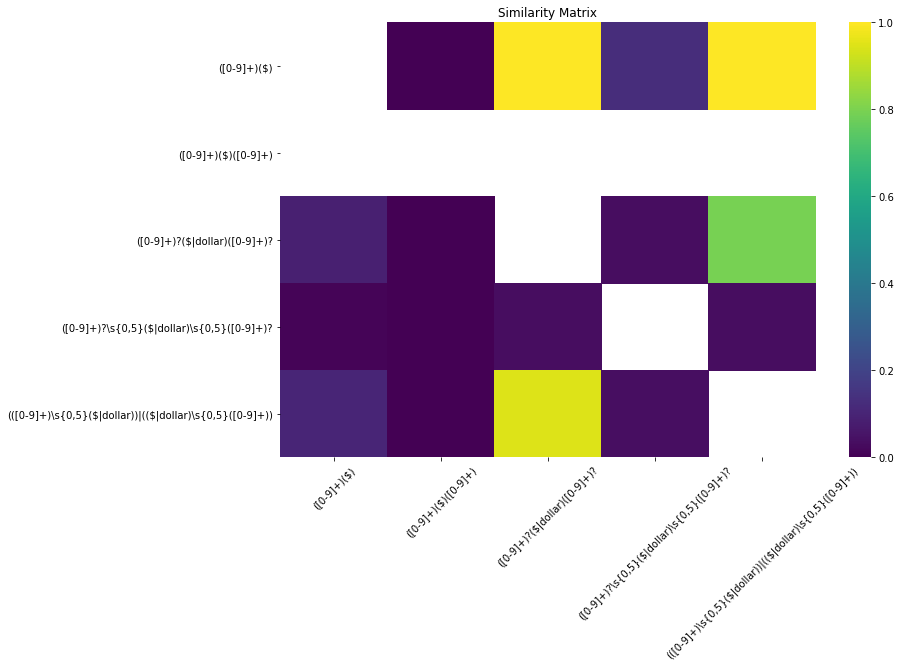

In [13]:
# [Answer to Ex. 9.2.3]
explore_money.report()